### MATH2504 S2, 2022, BigHW Submission 
### Submission form II of IV 

Student #1 name: Isaac Beh

Student #1 ID: 45919260

Student #2 name: Leanna Salve

Student #2 ID: 47038156

GitHub repo: [Isaac-Beh__Leanna-Salve-2504-2022-BigHW](https://github.com/49Indium/Isaac-Beh__Leanna-Salve-2504-2022-BigHW)

---

# Solution to [Question 5](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q5)

In [1]:
function is_perfect(x::Int)
    sum = 0
    # Only loop up two the geometric centre, as factos come in pairs
    for potential_factor in 1:isqrt(x)
        if x % potential_factor == 0
            sum += potential_factor + Int(x / potential_factor)
        end
    end
    # Account for the fact that square numbers will get their square root added twice
    if isqrt(x)^2 == x
        sum -= isqrt(x)
    end
    return sum == 2x
end

max_value = 10^6

# Get only the numbers such that is_perfect is true
perfect_numbers = (1:max_value)[is_perfect.(1:max_value)]
println("The perfect numbers less than $(max_value) are: $(perfect_numbers)")

The perfect numbers less than 1000000 are: [6, 28, 496, 8128]


# Solution to [Question 6](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q6)

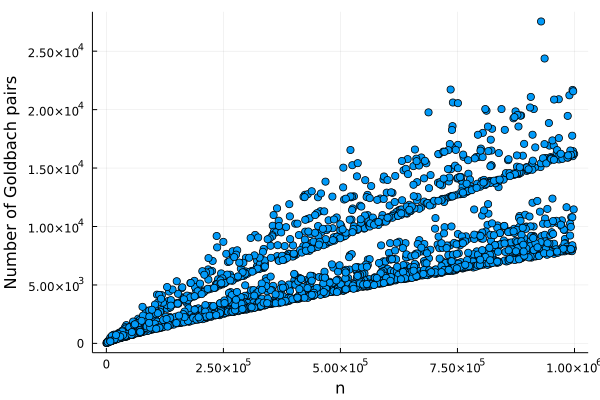

In [2]:
# *** TODO see BgHW checklist for question ***

"""
Returns the all the primes up to n.
"""
function sieve_of_Eratosthenes(n)
    primebits = ones(Bool,n) #Will contain true if the index is prime (initially all assumed prime)
    primebits[1] = false #The number 1 is not prime
    p = 2 #Smallest prime
    while p ≤ n
        primebits[2p:p:n] .= false
        p += 1
        while p ≤ n && !primebits[p]
            p += 1
        end
    end
    return (1:n)[primebits]
end

function get_goldbach_pairs(n = 10^5)

    even_range = 4:2:n
    number_of_pairs = zeros(Int64, n)

    # Remove 2 as its only pair is 2+2
    primes = setdiff(sieve_of_Eratosthenes(n), [2])
    append!(primes, n)
    # Add the pair for 4
    number_of_pairs[4] = 1

    number_of_primes = length(primes)

    # Bounds already checked for
    @inbounds for (i1, p1) in enumerate(primes[1:end-1])
        if 2*p1 <= n
            # Check the diagonal of the addition table
            number_of_pairs[2*p1] += 1

            i2 = i1 + 1
            # Index used so that once a high enough value is reached, it doesn't search the rest of the primebits
            while p1 + primes[i2] <= n
                # Count twice for each permutation of the pair
                number_of_pairs[p1+primes[i2]] += 2
                i2 += 1
            end
        end

    end

    return number_of_pairs
end

n = 10^6

number_of_pairs = get_goldbach_pairs(n)
even_range = 4:2:n

if 0 ∈ number_of_pairs[even_range]
    println("Found a counter example for Goldbach: $(2*findfirst(x -> x==0, number_of_pairs) + 2)")
end

indexes = rand(even_range, 2000)

using Plots
scatter(indexes,number_of_pairs[indexes],legend=false,xlabel="n",ylabel="Number of Goldbach pairs")


# Solution to [Question 7](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q7)

#### 7a:

Note: All the `@asserts` in the text below show that the following statements are true.

The code `random_license_plate() = String(rand('0':'9',3)) * " " * String(rand('A':'Z',3))` creates a new function. It is just short-hand for:
```Julia
function random_license_plate()
    return String(rand('0':'9',3)) * " " * String(rand('A':'Z',3))
end
```
For example, we can the typical calulus definition of a function:
```Julia
f(x) = x^2
@assert f(-10) == 100
```
<br>

The `*` operator concatinates string (i.e. sticks two strings together into one). In MATLAB you might do `[str1, str2]`, but this does not work in Julia, as it will not horizontally join the character arrays, but will create an array of two strings. Using `*`, we can join the strings together; for example:
```Julia
@assert "These " * "strings " * "will be" * " joined." == "These strings will be joined."
```
<br>

The function `rand` has many uses depending on the argument(s) used. If the first argument is a type or an array, it dictates the values to be choosen (with uniform probability). By default, they are the floats from 0 to 1. The next parameters dictate the size of the array returned. For example:
```Julia
array_of_numbers = rand(1:3, 5)
@assert length(array_of_numbers) == 5
@assert 1 <= minimum(array_of_numbers) && maximum(array_of_numbers) <= 3
```
<br>

The `[ X for _ in Y ]` pattern creates an array of `X` repeated for the length of array `Y`. In `[random_license_plate() for _ in 1:N]`, it creates an array of length `N`, each a seperate result of `random_license_plate()`. The variable `_` is an unused dummy variable; whilst it loops through `Y`, we do not care what it;s value is. For example:
```Julia
@assert [1 for _ in 1:100] == ones(Int, 100)
```
<br>

If a function is to return multiple values, it can return them as a tuple, as seen in `return indexes, plates`. This is similar to MATLAB syntax, so when calling the function, two variables can be assigned. For example:
```Julia
double_pair(x) = x, 2*x
a, b = double_pair(4)
@assert a == 4 && b == 8
```

The function `sortperm` sorts an array, but instead of returning the sorted version (like `sort`) it returns how the indexes change when they are sorted. If `1` is in the second place of the returned array, it means that the first element (when sorted) goes in the second place. For example:
```Julia
test_array = ['A', 'C', 'B']
permutation = sortperm(test_array)
@assert permutation == [1, 3, 2]
@assert test_array(permutation) == ['A', 'B', 'C']
```

#### 7b:

The probability of getting more than 1 index can be found by considering the following:
Let $M_i$ be the event that index $i$ matches the index 1234567890. Note that $\mathbb{P}\left(M_1\right)=\frac{1}{10^{12}}=10^{-12}$ as there are $10^{12}$ equally likely indicies. The probability of getting a matching index 1234567890 (which we will label $\mathbb{P}(A)$) is the complement of the probability of getting no matches. There are $10^7-1$ indicies other than 1234567890 and $M_1,\ldots,M_{10^7-1}$ are independent, so:
$$\mathbb{P}(A) = 1 - \mathbb{P}\left(M_1'\text{ and }M_2'\text{ and }\cdots\text{ and }M_{10^7-1}'\right) = \mathbb{P}\left(M_1'\right)\mathbb{P}\left(M_2'\right)\cdots\mathbb{P}\left(M_{10^7-1}'\right) = \left(\mathbb{P}\left(M_1'\right)\right)^{10^7-1} = \left(1 - \mathbb{P}\left(M_1\right)\right)^{10^7-1} = \left(1 - 10^{-12}\right)^{10^7-1}\approx0.99$$

In [3]:
(1 - 10^-12) ^ (10^7 - 1)

0.9999900002722147

#### 7c:

In [4]:
using Random

random_license_plate() = String(rand('0':'9',3)) * " " * String(rand('A':'Z',3))

function prepare_data(;N = 10^7)
    Random.seed!(1)
    indexes = rand(1:10^12, N)
    plates = [random_license_plate() for _ in 1:N]

    #One specific spot is set to a special value.
    special_spot = Int(floor(0.9*N)) #Arbitrary index
    indexes[special_spot], plates[special_spot] = 1234567890, "000 ZZZ"
    
    return indexes, plates
end

function prepare_sorted_data(;N = 10^7)
    indexes, plates = prepare_data(N=N)  
    perm = sortperm(indexes)
    return indexes[perm], plates[perm]
end

function find_special_plate(indexes, plates; special_index = 1234567890)
    for (i, index) in enumerate(indexes) 
        if index == special_index 
            return plates[i]
        end
    end 
    throw(Error("Index not found"))
end

# If actual values isn't found, a neighbouring value will be
function find_special_plate_binary_search(indexes, plates; special_index = 1234567890)
    lower_bound = 1
    upper_bound = length(indexes)
    while lower_bound < upper_bound
        midpoint = fld((upper_bound+lower_bound), 2)
        if indexes[midpoint] < special_index
            lower_bound = midpoint+1
        else
            upper_bound = midpoint
        end
    end
    return plates[lower_bound]
end

using BenchmarkTools

indexes, plates = prepare_sorted_data(N=10^7)

# Dolar signs to time the functions only, not retriving the global veriables
@btime find_special_plate($indexes, $plates)
@btime find_special_plate_binary_search($indexes, $plates)

  6.580 μs (0 allocations: 0 bytes)
  82.383 ns (0 allocations: 0 bytes)


"000 ZZZ"

We got the ordinary function to take 9.200 μs (equivalently 9200 ns), whereas the binary search took 117.505 ns, so the binary search is approximately $\frac{9200}{117.505} \approx 80$ times faster.

In [5]:
9200 / 117.505

78.29454065784435

#### 7d:

Each loop of the alogrithm reduces `upper_bound - lower_bound + 1` by a half (plus or minus 1 but this is insignificant when `indexes` is large, so the number of steps is large). Note the `+1` in the previous value is because `lower_bound` and `upper_bound` are inclusive bounds. As each iteration cuts down the options by approximately half, `upper_bound - lower_bound + 1` will be approximately $\frac{n}{2^i}$ after $i$ steps if $n$ is length of `indexes`. The algorithm ends when `upper_bound - lower_bound + 1` is equal to 1, so
$$\frac{n}{2^i}=1 \implies n=2^i \implies i=\log_2 n$$
when the algorithm ends. Thus, we have a time complexity of $\operatorname{O}\left(\log_2 n\right)$ which is equivalent to  $\operatorname{O}\left(\ln n\right)$.

# Solution to [Question 8](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q8)

#### 8a:

In [6]:
function array_table(array, heading)
    println(heading,":")
    for (i,a) in enumerate(array)
        println(i,"\t",a)
    end
end

names = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina"]

sorted_names = sort(names, by=(x)->length.(reverse(split(x," "))))
array_table(sorted_names, "length of last name")

length of last name:
1	Amy Chan
2	Paul Vrbik
3	Jesse Woods
4	Maithili Mehta
5	Andy Ferris
6	Emma Comino
7	Thomas Graham
8	Elaine Schenk
9	Tom Cranitch
10	Anna Foeglein
11	Paul Bellette
12	Alistair Falconer
13	Sam Hambleton
14	Tina Moghaddam
15	Yoni Nazarathy
16	Ivana Carrizo-Molina


#### 8b:

In [7]:
function my_sort_bubble(a_old; by = identity)
    a = copy(a_old)
    n = length(a)
    for i in 1:n
        for j in 1:n-i
            if by(a[j]) > by(a[j+1])
               a[j], a[j+1] = a[j+1], a[j]#swaps the elements in the original 
            end
        end
    end
    return a
end
sorted_bubble_names = my_sort_bubble(names, by=(x)->length.(reverse(split.(x," "))))
array_table(sorted_bubble_names,"Sorted by last name")

Sorted by last name:
1	Amy Chan
2	Paul Vrbik
3	Jesse Woods
4	Maithili Mehta
5	Andy Ferris
6	Emma Comino
7	Thomas Graham
8	Elaine Schenk
9	Tom Cranitch
10	Anna Foeglein
11	Paul Bellette
12	Alistair Falconer
13	Sam Hambleton
14	Tina Moghaddam
15	Yoni Nazarathy
16	Ivana Carrizo-Molina


#### 8c:

In [8]:
function my_sort_quick(A_original; by = identity)
    A = copy(A_original)
    
    function helper(start_index, end_index)
        pivot_index = end_index
        pivot_value = by(A[pivot_index])
        
        unsorted_lower_bound = start_index
        # The unsorted upperbound is the pivot
        
        while unsorted_lower_bound < pivot_index
            if by(A[unsorted_lower_bound]) > pivot_value
                A[unsorted_lower_bound], A[pivot_index - 1], A[pivot_index] = A[pivot_index - 1], A[pivot_index], A[unsorted_lower_bound]
                pivot_index -= 1
            else
                unsorted_lower_bound += 1
            end
        end
        
        if start_index < pivot_index - 1
            helper(start_index, pivot_index - 1)
        end
        if pivot_index + 1 < end_index
            helper(pivot_index + 1, end_index)
        end
    end
    
    helper(1, length(A))
    return A
end

sorted_names = my_sort_quick(names,by=(x)->length.(reverse(split(x," "))))
array_table(sorted_names,"Sorted by last name")


Sorted by last name:
1	Amy Chan
2	Paul Vrbik
3	Jesse Woods
4	Maithili Mehta
5	Andy Ferris
6	Emma Comino
7	Elaine Schenk
8	Thomas Graham
9	Tom Cranitch
10	Paul Bellette
11	Anna Foeglein
12	Alistair Falconer
13	Sam Hambleton
14	Yoni Nazarathy
15	Tina Moghaddam
16	Ivana Carrizo-Molina


#### 8d:

In [15]:
using BenchmarkTools
using Random
using ProfileView
Random.seed!(0)
data = rand(Int,10^4)

# Note, this function will take some time as it runs wach function many times
function sort_timing()
    println("In-built sort on large data:" )
    @btime sort(data);

    println("My sort bubble on large data:" )
    @btime my_sort_bubble(data);

    println("Quick sort implementation on larage data:" )
    @btime my_sort_quick(data);
end
sort_timing();

In-built sort on large data:
  337.900 μs (2 allocations: 78.17 KiB)
My sort bubble on large data:
  45.829 ms (2 allocations: 78.17 KiB)
Quick sort implementation on larage data:
  587.900 μs (12624 allocations: 275.41 KiB)


# Solution to [Question 9](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q9)

#### 9a:

In [1]:
using LinearAlgebra
using Random

Random.seed!(0)
A = round.(10*rand(2,3))
B = round.(10*rand(3,4))

function my_mult_by_cols(A,B)
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef,n,p)

    for j in 1:p
        C[:, j] .= +([A[:, i] * B[i,j] for i in 1:m]...)
    end
    display(C)
end
my_mult_by_cols(A,B)

2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0   26.0

#### 9b:

In [1]:
function my_mult_by_rows(A,B)
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef,n,p)
   
    for i in 1:n
        C[i,:] = +([A[i,j] * B[j,:] for j in 1:m]...)

    end
    display(C)
end
my_mult_by_rows(A,B)

UndefVarError: UndefVarError: A not defined

#### 9c:

In [11]:
function my_mult_sum_outer_products(A,B)
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef,n,p)
    
    for j in 1:m
    C[i,j] = +([A[:,i] * B[i,:] for i in 1:n]) #compute inner product of i'th row of A and j'th column of B
    end
    display(C)
end

my_mult_sum_outer_products(A,B)

MethodError: MethodError: no method matching *(::Vector{Float64}, ::Vector{Float64})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
  *(!Matched::StridedMatrix{T}, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/matmul.jl:44
  *(::StridedVecOrMat, !Matched::Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/lq.jl:266
  ...

#### 9d:
